Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [ ]:
import numpy as np
import pandas as pd
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)
df



,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [ ]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [ ]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [ ]:
df.iloc[[3, 4, 8], [0, 1]]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [ ]:
df[df['visits'] > 3]

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [ ]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [ ]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [ ]:
df[(df['age'] >= 2) & (df['age'] <= 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [ ]:
df.loc['f', 'age'] = 1.5

**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [ ]:
df['visits'].sum()

19

**12.** Calculate the mean age for each different animal in `df`.

In [ ]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [ ]:
df.loc['k'] = ['dog', 2, 2, 'yes']
df = df.drop('k')
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [ ]:
df['animal'].value_counts()

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [ ]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [ ]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [ ]:
df['animal'] = df['animal'].replace('snake', 'python')
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**18.** Load the ny-flights dataset to Python

In [ ]:
df = pd.read_csv('ny-flights.csv')
df

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [ ]:
df['airline_id'].value_counts().idxmax()

20409

**20.** Draw a plot between dep_delay and arr_delay

<Axes: xlabel='dep_delay', ylabel='arr_delay'>

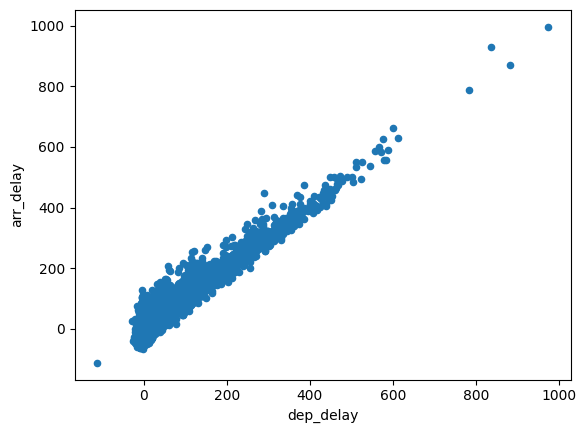

In [ ]:
df.plot.scatter(x='dep_delay', y='arr_delay')

## **INSIGHT**
arr and dep delay have a linear relationship

#   which route flights have maximum delay?

In [ ]:
route=df.groupby(['origin','dest'])['dep_delay'].sum().sort_values(ascending=False)
route

origin  dest
LGA     ATL     18237.0
JFK     LAX     17772.0
        MCO     15893.0
        SFO     13436.0
        SJU     12925.0
                 ...   
LGA     JAX        -6.0
BUF     CLE       -12.0
SYR     CLE       -13.0
LGA     DCA       -19.0
        BOS      -764.0
Name: dep_delay, Length: 187, dtype: float64

# Which day had maximum flights?

In [ ]:
df['fl_date'].value_counts().idxmax()

'2014-01-03 00:00:00'

# **DIABETES**

In [ ]:
df = pd.read_csv('/content/diabetes_model.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,77,82,41,42,35.8,0.156,35,0
1,9,122,56,0,0,33.3,1.114,33,1
2,0,113,76,0,0,33.3,0.278,23,1
3,1,139,62,41,480,40.7,0.536,21,0
4,10,161,68,23,132,25.5,0.326,47,1
...,...,...,...,...,...,...,...,...,...
609,4,114,64,0,0,28.9,0.126,24,0
610,2,175,88,0,0,22.9,0.326,22,0
611,3,121,52,0,0,36.0,0.127,25,1
612,7,136,74,26,135,26.0,0.647,51,0


<Axes: >

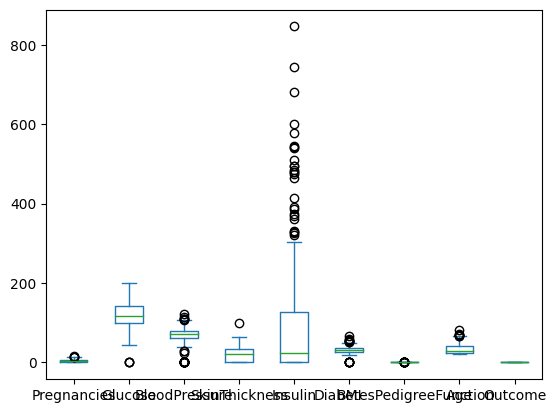

In [ ]:
df.plot.box()

<Axes: ylabel='Frequency'>

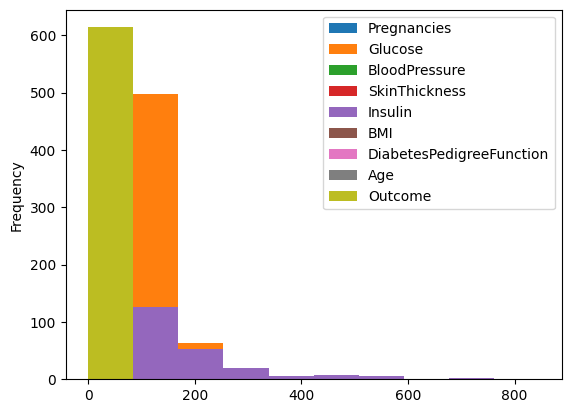

In [ ]:
df.plot.hist()

In [ ]:
import matplotlib.pyplot as plt

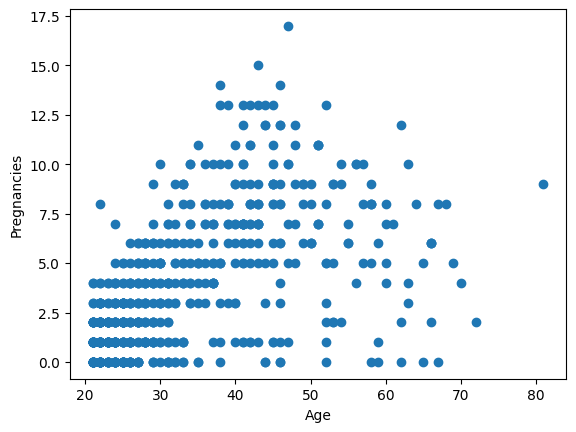

In [ ]:
plt.scatter(df['Age'], df['Pregnancies'])
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()

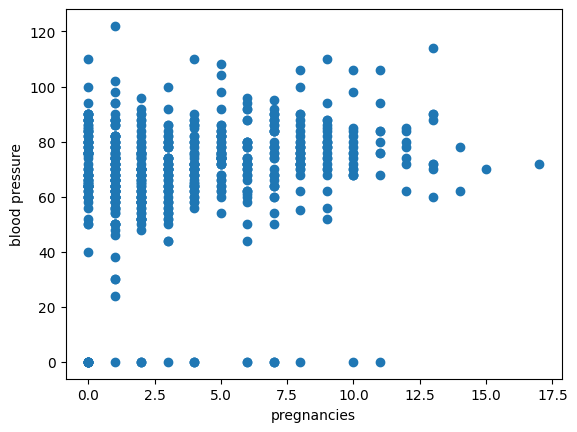

In [ ]:
plt.scatter(df['Pregnancies'], df['BloodPressure'])
plt.xlabel('pregnancies')
plt.ylabel('blood pressure')
plt.show()

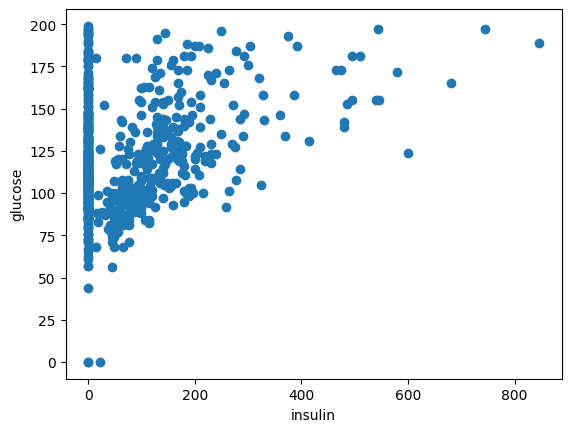

In [ ]:
plt.scatter(df['Insulin'], df['Glucose'])
plt.xlabel('insulin')
plt.ylabel('glucose')
plt.show()

# **Insight**
max glucose level at 0 insulin level ,insulin and glucose level are related

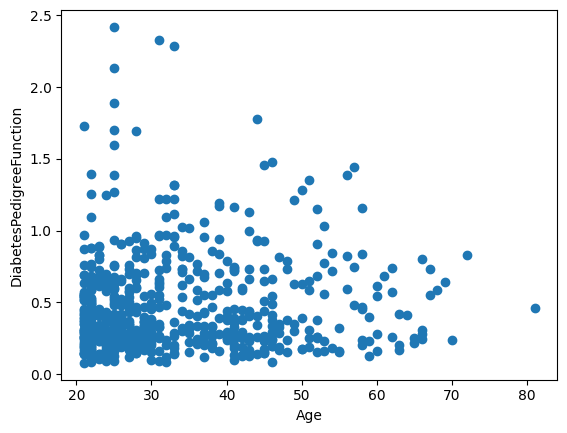

In [ ]:
plt.scatter(df['Age'],df['DiabetesPedigreeFunction'])
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

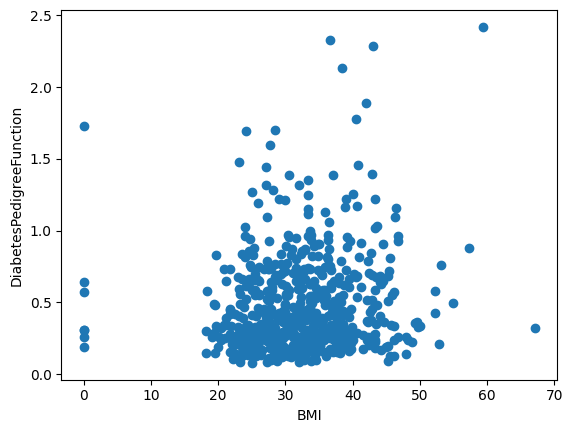

In [ ]:
plt.scatter(df['BMI'],df['DiabetesPedigreeFunction'])
plt.xlabel('BMI')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

# **INSIGHT**
Most of the diabetespedigree fuction value from below 1 have bmi in range between 20-50

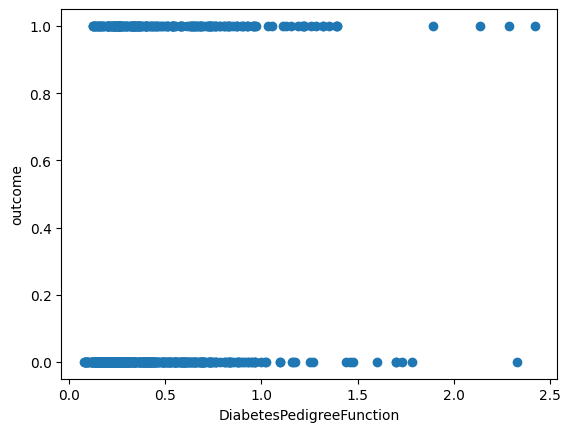

In [ ]:
plt.scatter(df['DiabetesPedigreeFunction'],df['Outcome'])
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('outcome')
plt.show()

In [ ]:
cormatrix=df.corr()
cormatrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.137245,0.165089,-0.101968,-0.083955,-0.005699,-0.039171,0.552744,0.201069
Glucose,0.137245,1.000000,0.151446,0.073133,0.320291,0.237282,0.134167,0.251873,0.478688
BloodPressure,0.165089,0.151446,1.000000,0.209564,0.083704,0.283813,0.025739,0.227663,0.056902
SkinThickness,-0.101968,0.073133,0.209564,1.000000,0.433628,0.379994,0.180571,-0.111832,0.086276
Insulin,-0.083955,0.320291,0.083704,0.433628,1.000000,0.190669,0.173699,-0.037037,0.133967
BMI,-0.005699,0.237282,0.283813,0.379994,0.190669,1.000000,0.124730,0.037500,0.316448
DiabetesPedigreeFunction,-0.039171,0.134167,0.025739,0.180571,0.173699,0.124730,1.000000,0.045008,0.164681
Age,0.552744,0.251873,0.227663,-0.111832,-0.037037,0.037500,0.045008,1.000000,0.221598
Outcome,0.201069,0.478688,0.056902,0.086276,0.133967,0.316448,0.164681,0.221598,1.000000


In [ ]:
np.argmin(cormatrix['Outcome'])


2

In [ ]:
cormatrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.478688
BMI                         0.316448
Age                         0.221598
Pregnancies                 0.201069
DiabetesPedigreeFunction    0.164681
Insulin                     0.133967
SkinThickness               0.086276
BloodPressure               0.056902
Name: Outcome, dtype: float64

# **INSIGHT**
blood pressure and skinthickness have less effect on outcome,glucose level followed by bmi,age,pregnancies,diabetes pedigree and insulin have effect on outcome

In [ ]:
cormatrix['Glucose'].sort_values(ascending=False)

Glucose                     1.000000
Outcome                     0.478688
Insulin                     0.320291
Age                         0.251873
BMI                         0.237282
BloodPressure               0.151446
Pregnancies                 0.137245
DiabetesPedigreeFunction    0.134167
SkinThickness               0.073133
Name: Glucose, dtype: float64

# **INSIGHT**
glucose and insulin have positive relation

In [ ]:
cormatrix['BMI'].sort_values(ascending=False)

BMI                         1.000000
SkinThickness               0.379994
Outcome                     0.316448
BloodPressure               0.283813
Glucose                     0.237282
Insulin                     0.190669
DiabetesPedigreeFunction    0.124730
Age                         0.037500
Pregnancies                -0.005699
Name: BMI, dtype: float64

In [ ]:
cormatrix['Age'].sort_values(ascending=False)

Age                         1.000000
Pregnancies                 0.552744
Glucose                     0.251873
BloodPressure               0.227663
Outcome                     0.221598
DiabetesPedigreeFunction    0.045008
BMI                         0.037500
Insulin                    -0.037037
SkinThickness              -0.111832
Name: Age, dtype: float64

In [ ]:
import seaborn as sns

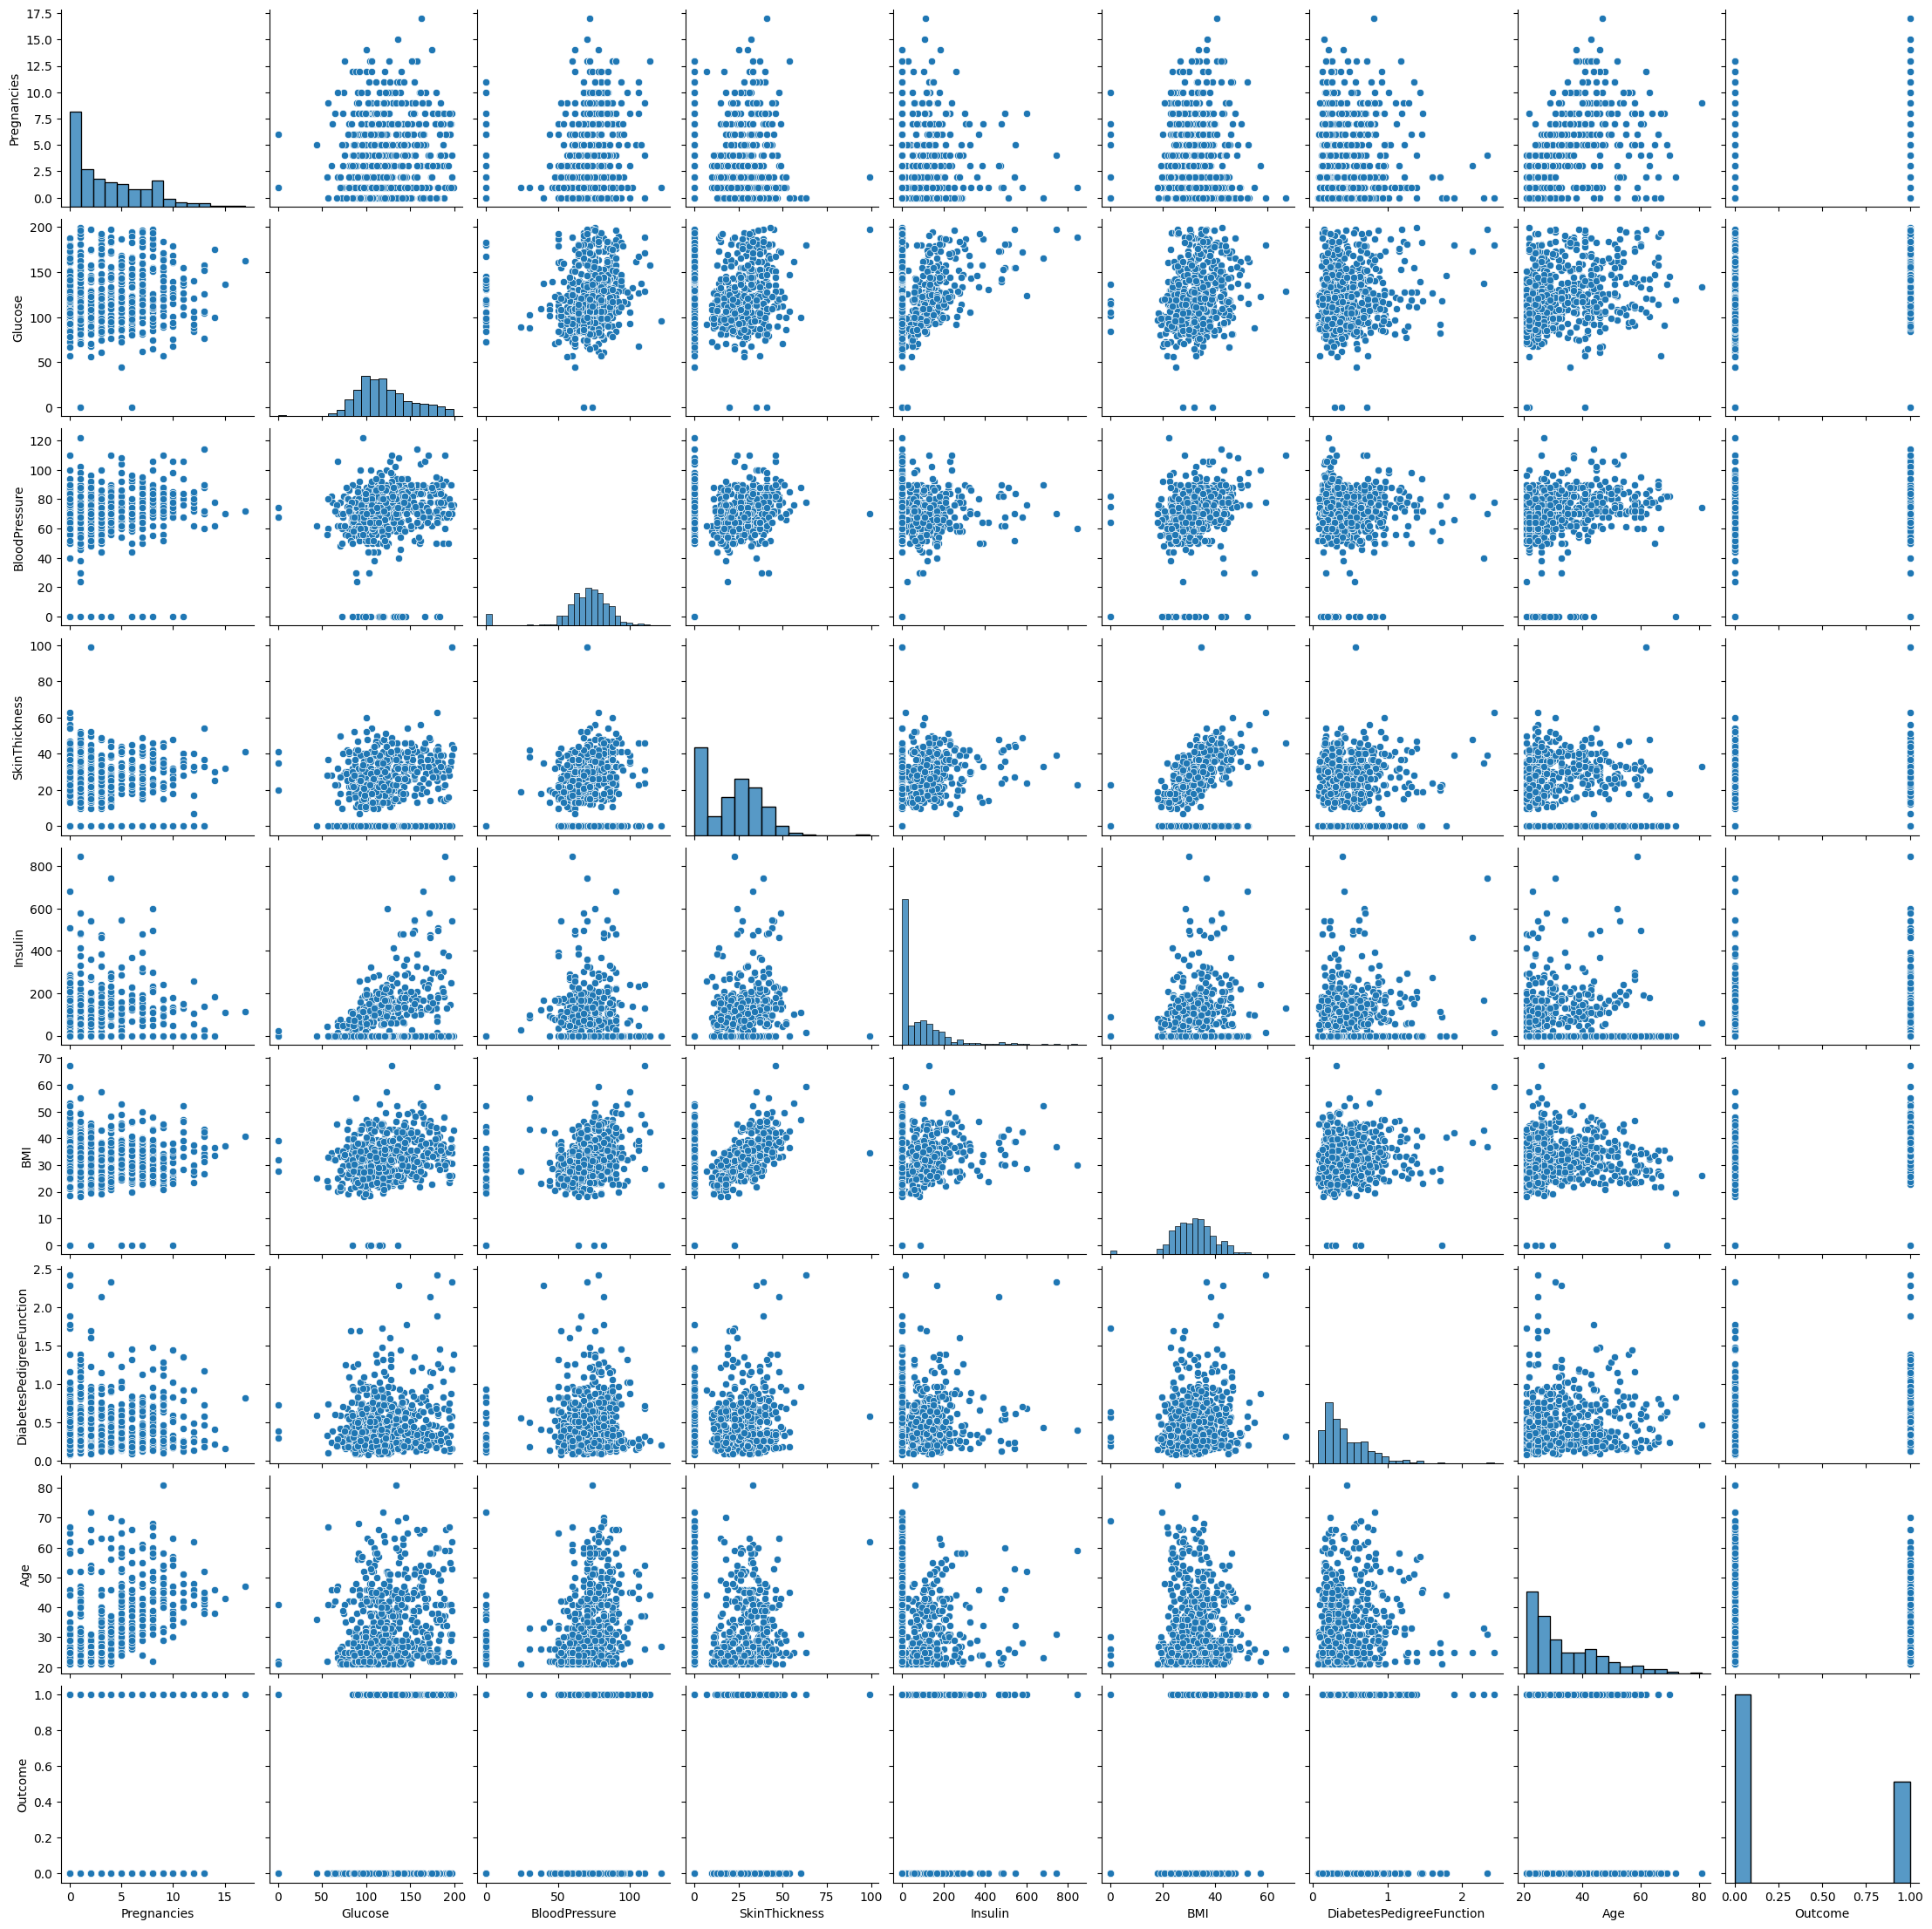

In [ ]:
sns.pairplot(df)
plt.show()



## **insight**
glucose and insulin have a positive relation,bmi and skin thickness also shows positive relation

In [199]:
from mpl_toolkits.mplot3d import Axes3D

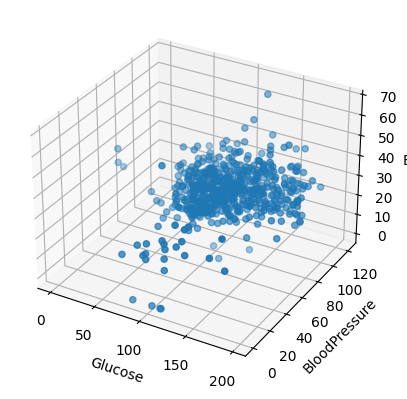

In [208]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Glucose'], df['BloodPressure'], df['BMI'])
ax.set_xlabel('Glucose')
ax.set_ylabel('BloodPressure')
ax.set_zlabel('BMI')

plt.show()

# **insight**
more data points are in region with glucose level( 50-150),bloodpressure (120-122) and bmi below 30